In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
def get_median_in_range(age_range):
    if age_range == "71+":
        return 73
    elif age_range == "<20":
        return 18
    low, high = map(int, age_range.split('-'))
    return (low + high) // 2

relationship_map = {
    "Married": 1,
    "Single, never married": 0,
    "In a relationship, but not married": 0,
    "Divorced": 0,
    "Widowed": 0,
    "Divorced - In a relationship, but not married": 0,
    "Widowed - In a relationship, but not married": 0,
    "Divorced - Remarried": 1,
    "Widowed - Remarried": 1,
    }

data = pd.read_csv('2023cleaned.csv')
data = data.dropna(subset=['Age', 'FI rate'])
data['Children'] = data['Children'].fillna(0)

data['Additional Children'] = data['Additional Children'].fillna(0)

data = data[['Contributors', 'Age', 'Relationship', 'Children', 'Additional Children', 'Wage', 'FI rate']]
# convert data to numeric
data['Age'] = data['Age'].apply(get_median_in_range)
data['Relationship'] = data['Relationship'].map(relationship_map)
data = data[data['Contributors'] != '>3']
data['Contributors'] = data['Contributors'].astype(int)
data['Wage'] = data['Wage'].astype(float)
data = data.dropna(subset=['Wage'])
print(data.count())



Contributors           907
Age                    907
Relationship           907
Children               907
Additional Children    907
Wage                   907
FI rate                907
dtype: int64


In [3]:
# linear regression with age only
model = LinearRegression()
X = data[['Age']]
y = data['FI rate']
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(model.predict([[18]]))
data['Predicted FI rate'] = model.predict(X)
correlation = data['FI rate'].corr(data['Predicted FI rate'])
print(correlation, correlation ** 2)
print(model.score(X, y))

Coefficients: [1.82979672]
Intercept: -27.18301990729269
[5.75332103]
0.523038896731194 0.2735696874937846
0.2735696874937842


C:\Users\Neville\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


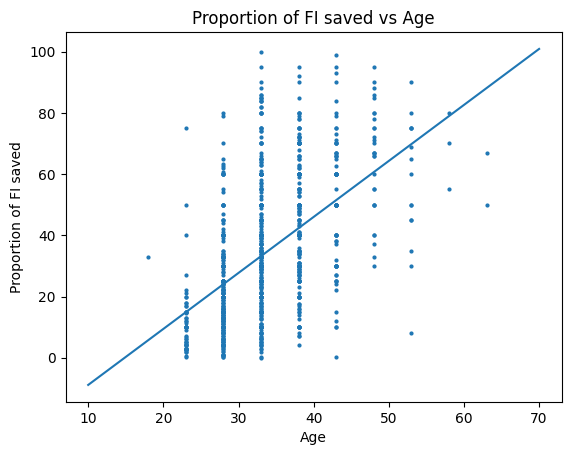

In [4]:
x = np.linspace(10, 70, 100)
y = model.coef_[0] * x + model.intercept_

# Plot
plt.plot(x, y)
plt.scatter(data['Age'], data['FI rate'], s=4)
plt.xlabel("Age")
plt.ylabel("Proportion of FI saved")
plt.title("Proportion of FI saved vs Age")
plt.show()

In [5]:
# linear regression with marriage and children
model = LinearRegression()
X = data[['Relationship', 'Children', 'Additional Children']]
y = data['FI rate']
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
data['Predicted FI rate'] = model.predict(X)
correlation = data['FI rate'].corr(data['Predicted FI rate'])
print(correlation, correlation ** 2)
print(model.score(X, y))

Coefficients: [ 4.27970243  2.36408639 -4.2911233 ]
Intercept: 34.01518859983003
0.2579006107897694 0.06651272504573612
0.0665127250457358


In [6]:
# linear regression
model = LinearRegression()
X = data[['Age', 'Relationship', 'Children', 'Additional Children']]
y = data['FI rate']
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
data['Predicted FI rate'] = model.predict(X)
correlation = data['FI rate'].corr(data['Predicted FI rate'])
print(correlation, correlation ** 2)


X_cons = sm.add_constant(X)
model_sm = sm.OLS(y, X_cons).fit()
print(model_sm.conf_int())

Coefficients: [ 1.82955294 -1.13773301 -0.59365328 -1.36067982]
Intercept: -25.380300345361384
0.5277076418195291 0.27847535523472844
                             0          1
const               -32.826185 -17.934415
Age                   1.608972   2.050134
Relationship         -4.107022   1.831556
Children             -2.258084   1.070777
Additional Children  -2.688729  -0.032630


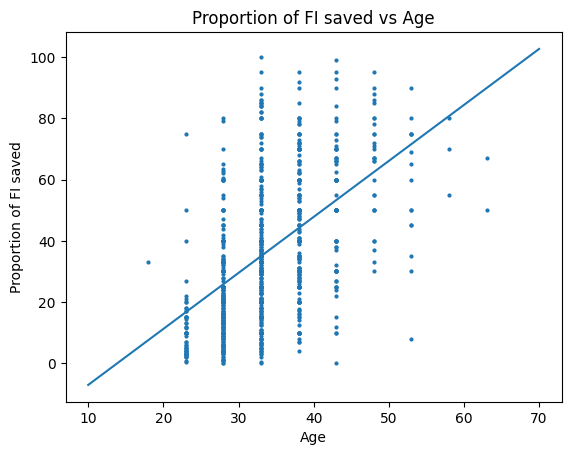

In [7]:
x = np.linspace(10, 70, 100)
y = model.coef_[0] * x + model.intercept_

# Plot
plt.plot(x, y)
plt.scatter(data['Age'], data['FI rate'], s=4)
plt.xlabel("Age")
plt.ylabel("Proportion of FI saved")
plt.title("Proportion of FI saved vs Age")
plt.show()

In [8]:
# linear regression
model = LinearRegression()
X = data[['Age', 'Wage', 'Additional Children', 'Relationship', 'Children']]
y = data['FI rate']
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(model.predict([[18, 0, 1, 0, 0]]))
data['Predicted FI rate'] = model.predict(X)
correlation = data['FI rate'].corr(data['Predicted FI rate'])
print(correlation, correlation ** 2)

Coefficients: [ 1.78710448e+00  1.86332608e-05 -1.53081761e+00 -2.47322056e+00
 -6.56834207e-01]
Intercept: -27.08949450225787
[3.54756855]
0.5472137961256497 0.2994429386702441


C:\Users\Neville\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [9]:
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X = data[['Age', 'Wage', 'Additional Children', 'Relationship', 'Children']]
y = data['FI rate']

model = make_pipeline(interaction, LinearRegression())

model.fit(X, y)
data['Predicted FI rate'] = model.predict(X)
correlation = data['FI rate'].corr(data['Predicted FI rate'])
print(correlation, correlation ** 2)

0.5614927464578341 0.31527410432476155
